In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r"C:\Users\USER\Desktop\Credit risk prediction\datasetv1-1.xlsx")

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [3]:
df = df.drop(columns=['last_year_benefitted', 'graduation'])

In [4]:
for feature in df.columns:
    df[feature] = df[feature].astype('category')

In [ ]:
for feat in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(df, x=feat, order=df[feat].value_counts().index, palette='coolwarm')
    plt.title(f'Distribution of {feat}')
    plt.xlabel(feat, fontsize=12)
    plt.ylabel('count', fontsize=12)
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.savefig(rf'C:\Users\USER\Desktop\Credit risk prediction\docs\plots_before_preprocessing\{feat}.png')
    plt.show()

In [14]:
def dropMissing(data, threshold):
    cols_drop = []
    for feature in data.columns:
        if ((data[feature].isna().sum()) >= threshold):
            cols_drop.append(feature)
            
    return data.drop(columns=cols_drop)

In [15]:
cleaner_sample = dropMissing(df, len(df)/2)

In [16]:
cleaner_sample.shape

(355, 24)

In [ ]:
for feat in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(df, x=feat, order=df[feat].value_counts().index, palette='coolwarm')
    plt.title(f'Distribution of {feat}')
    plt.xlabel(feat, fontsize=12)
    plt.ylabel('count', fontsize=12)
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.savefig(rf'C:\Users\USER\Desktop\Credit risk prediction\docs\plots_afer_removing_missing_values\{feat}.png')
    plt.show()

In [7]:
pd.crosstab(df['gender'], df['repayment_status'])

repayment_status,Fully_paid,Partially_paid,not_paid
gender,,,
Female,70,30,38
Male,86,56,75


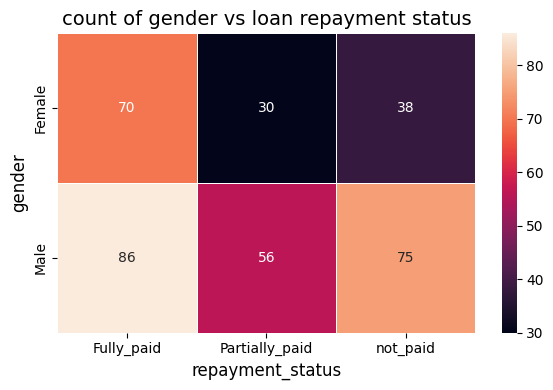

In [12]:
gender_repayment = pd.crosstab(df['gender'], df['repayment_status'])
plt.figure(figsize=(6, 4))
sns.heatmap(gender_repayment, annot=True, fmt='d', linewidth=.5)
plt.title('count of gender vs loan repayment status', fontsize=14)
plt.xlabel('repayment_status', fontsize=12)
plt.ylabel('gender', fontsize=12)
plt.tight_layout()
plt.savefig(rf'C:\Users\USER\Desktop\Credit risk prediction\docs\univariate_analysis\gender_repayment.png')
plt.show()

In [5]:
encoded = pd.read_csv('sample_X1.csv')

In [30]:
e_columns = list(encoded.columns)

In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [6]:
X = encoded.drop(columns='repayment_status')
y = encoded['repayment_status']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
fs = SelectKBest(score_func=chi2, k=10)
selected = fs.fit(X, y)

In [15]:
selected

SelectKBest(score_func=<function chi2 at 0x0000013471CCC0E0>)

In [8]:
fs = SelectKBest(score_func=chi2, k=10)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tree classifier training
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_fs, y_train)

# generalization test
y_pred = clf.predict(X_test_fs)

# model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7605633802816901
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.93      0.81      0.87        16
           2       0.69      0.50      0.58        18

    accuracy                           0.76        71
   macro avg       0.78      0.73      0.75        71
weighted avg       0.76      0.76      0.75        71

Confusion Matrix:
[[32  1  4]
 [ 3 13  0]
 [ 9  0  9]]


In [43]:
cm = confusion_matrix(y_test, y_pred)

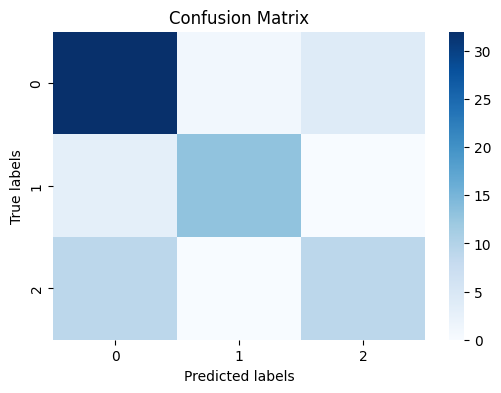

In [45]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=False, cmap="Blues", fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.savefig('conf_matrix_heatmap.png')
plt.show()

In [ ]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer
from sdv.evaluation.single_table import evaluate_quality

# Creating metadaata for the dataset
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

# Specify the categorical columns
for col in data.columns:
    if data[col].dtype == 'object':
        metadata.update_column(
            column_name=col,
            sdtype='categorical'
        )

# Creating CTGAN synthesizer
synthesizer = CTGANSynthesizer(metadata, epochs=100)
synthesizer.fit(data)

# Generating synthetic data
synthetic_data = synthesizer.sample(num_rows=len(data)*3)
sample = pd.DataFrame(synthetic_data)

# Evaluating the quality of the synthetic data
quality_report = evaluate_quality(data, sample, metadata)

# Print the quality report
print(quality_report)